# COGS 108 - Covid influence on IMDb rating 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

### Link to video presentation: https://youtu.be/ctxBKgSMMMs

# Overview

As the COVID-19 pandemic has influenced various aspects of daily lives, the film industry no doubt has also suffered from enormous impacts under factors like obstacles in movie production and the psychological states of the audience. For our project, we aim to determine whether the ratings for movies during the pandemic are significantly different from those before. We are also interested in whether the genres of the movies play a role in influencing the ratings. We extracted data from one of the most recognizable platforms, IMDb, and categorized them into 2018-2019 before-pandemic group and 2020-2022 during-pandemic group. We conducted t-test analysis between the distribution in movie rating before and after the pandemic. We also conducted linear regression to determine if there is a statistically significant linear relationship between the independent variable (year before and after pandemic) and the dependent variable (movie rating). Upon analysis, we found that there is a significant distribution difference between movie rating before and after the pandemic, but we fail to reject the null hypothesis using linear regression. We also analyzed the role of genres as factors affecting the movie ratings. We selected the top 10 common genres and ran t-tests on each of them. We found significance in all 10 genres except 1) Comedy,Talk-Show; 2) Drama,Romance and 3) Crime,Drama,Mystery. Overall, we conclude that both Covid-19 and genres of movies have significant influence on movie rating before and during the pandemic. 

# Names

- Jiaqi Chen A15572667
- Caiyi Li A15612529
- Man Kui Sit A17148723
- Yutong Chen A15907095
- Xingyu Deng A15851708

<a id='research_question'></a>
# Research Question

*Are the average IMDb ratings of movie and TV shows released during the COVID-19 pandemic (2020-2022) generally lower than those released before the pandemic (2018-2019)? Do genres also have an influence on the ratings?*

<a id='background'></a>

## Background & Prior Work

COVID-19 has changed nearly every aspect of people’s life. With the further spread of the pandemic around the world, its impact on the movie market is also spreading, with box office totals falling and many movies being forced to withdraw or postpone their premieres. Movies in progress have also been forced to suspend filming. According to a report from Florida State University, the US box office loss during the epidemic was about $5 billion (1). In addition to the direct box office loss, COVID-19 will certainly also have a huge impact on various aspects of film production and distribution, and the loss of the global film market during the pandemic will be much higher than this figure.

While COVID-19 poses a real threat to cinemas, it also triggers a wave of innovation, allowing the film industry to find new possibilities. When lots of movie theatres are forced to close down and many people are quarantined at home, people's demand for film and television consumption tends to shift online. From a report written by Brad Adgate on Forbes, we learn that the demand for TV series, online dramas, and online movies has increased significantly. Some theatrical movies are directly uploaded to online platforms; there is also a spike in the number of views and membership size of online video platforms (2). On one hand, it shows that film and video industry has a diversity of revenue sources; on the other hand, it reveals that people's need for film and television culture is continuous.

We, as a group, are all passionate about media and entertainment. Therefore, we are interested in exploring how the pandemic may affect people’s opinions and attitudes of the entertainment industry, especially the film industry. As the pandemic has limited the ways of entertainment we could choose from, we are eager to find whether it has an influence on our standards towards movies.

Moreover, researches have shown that COVID-19 has affected both the physical and mental well-being of people. By studying the Mood responses of 1,062 participants (386 male, 676 female), Peter C. Terry and other researchers came up with the conclusion that there is a significant mood disturbance among the population during the period of COVID-19 restrictions (3). We wonder if the increased level of negative emotions will also influence how people rate a movie.

References:
- 1)https://union.fsu.edu/movies/blog/COVID

- 2)https://www.forbes.com/sites/bradadgate/2021/04/13/the-impact-covid-19-had-on-the-entertainment-industry-in-2020/?sh=67323391250f

- 3)https://www.frontiersin.org/articles/10.3389/fpsyg.2020.589598/full

# Hypothesis


We predict that the ratings for movies from 2020 to 2022 of the ongoing pandemic would be significantly lower than those before the pandemic in 2018 and 2019. Both the overall performance of the film industry and the audience’s evaluation would decrease. The overall performance of the firm industry would decrease because of the various problems caused by the COVID-19, such as the health of the crew and the difficulty of them gathering together, which we assume is illustrated by the quality of produced movies. It is possible that the bad moods of the audience would influence how they rate the movies. The audience could also be more strict with movie ratings for they spend more time in solitude, allowing more careful observation and rigorous judgments of the movies.

# Dataset(s)

We use dataset from the authoritative platform IMDb to obtain the ratings for movies during the past years. More specifically, we use average ratings from 2018 to 2022 for drawing comparisons before(2018-2019) and during the pandemic(2020-2022). We focus on variables such as the release year of movie for grouping them and the average rating for each movie. Information for each movie/TV show is stored under the a unique identifier for us to locate the year and the rating together. We would calculate the average movie rating for each year and analyze them to see whether a significant difference exists. We also include the genre variable to investigate the possible effect of genre on the ratings.

### I.Basic information of titles
- **1) Dataset Name:** title.basics.tsv
- **2) Link to the dataset:** https://www.imdb.com/interfaces/
- **3) Number of observations:** 8723787 
- **4) Description:** This dataset contains data on the basic information of titles ranging from 1874 up to 2022. The observation is each title of the movie/TV show in the IMDb database.
- **5) Variable:**
<br>
     

|Variable|Description|
|:-|:-|
|tconst |alphanumeric unique identifier of the title |
|titleType  |the type/format of the title |
|primaryTitle |the more popular title|
|originalTitle  |original title in orginal language |
|isAdult  |0: non-adult title; 1: adult title |
|startYear  |the release year of a title|
|endYear  |TV Series end year. ‘\N’ for all other title types |
|runtimeMinutes  |primary runtime of the title in minutes|
|genres  |up to three genres associated with the title|

#### II.IMDb ratings for titles
- **1)Dataset Name:** title.ratings.tsv
- **2)Link to the dataset:** https://www.imdb.com/interfaces/
- **3)Number of observations:** 1218446
- **4)Description:** This dataset contains the information of IMDb ratings and votes for titles. The observation is each title of the movie/TV show in the IMDb database.
- **5)Variable:**

|Variable|Description|
|:-|:-|
|tconst |alphanumeric unique identifier of the title |
|averageRating  |weighted average of all the individual user ratings |
|numVotes |number of votes the title has received|


As these two datasets have the common column “tconst”, which is the unique identifier of each title, we will use merge function to match the basic information of the title and the rating it has. **(Note: Data download date: Feb 24 2022)**

# Setup

In [1]:
## First import all necessary libraries for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

## Movie Data
### 1. Movie Basics data
<br>
First we load the data from tsv file for basic movie information, including the title and genre for each movie/TV show. The data did need to be cleaned because there is a lot of uncessary information, for example the primary title (original Title would be enough), titleType, runtime Minutes, and endYear(since we only have to consider year that the movie is released). We want to remove all the unnecessary information since it won't be useful to our data analysis.

In [2]:
## reading basics file 
tsv_file = "basics.tsv"
basics = pd.read_csv(tsv_file,sep='\t',low_memory=False)

# dropping null values
basics = basics.dropna()

## drop all uncessary columns
basics = basics.drop(['titleType','primaryTitle','runtimeMinutes','endYear'], axis = 1)

## print out to see the modified data
basics.head()

,tconst,originalTitle,isAdult,startYear,genres
0,tt0000001,Carmencita,0,1894,"Documentary,Short"
1,tt0000002,Le clown et ses chiens,0,1892,"Animation,Short"
2,tt0000003,Pauvre Pierrot,0,1892,"Animation,Comedy,Romance"
3,tt0000004,Un bon bock,0,1892,"Animation,Short"
4,tt0000005,Blacksmith Scene,0,1893,"Comedy,Short"


In [3]:
basics.shape

(8723787, 5)

<a id='movie_rating_data_clean'></a>
### 2. Movie Rating data
Then we load & clean data from tsv file for movie rating data. The data did not need to be cleaned much because it only had the tconst, averageRating and number of votes. We only needed to drop all rows that had any null values. 

In [4]:
## reading movie ratings file 
tsv_file2 = "ratings.tsv"
ratings = pd.read_csv(tsv_file2,sep='\t',low_memory=False)

# dropping null values
ratings = ratings.dropna()

## print out to see the modified data
ratings.head()



,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,243
2,tt0000003,6.5,1631
3,tt0000004,6.0,158
4,tt0000005,6.2,2458


In [5]:
ratings.shape

(1218446, 3)

### 3. Merge two data
Here we want to merge [basics](#'movie_data_clean') and [rating](#'movie_rating_data_clean') based on the common identifier "tconst" to get it ready for data analysis.

In [6]:
## merge the two data sets base on the tconst identifer
data = pd.merge(basics, ratings, on ="tconst")

In [7]:
## print the head to see the data
data.head()

,tconst,originalTitle,isAdult,startYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,0,1894,"Documentary,Short",5.7,1864
1,tt0000002,Le clown et ses chiens,0,1892,"Animation,Short",6.0,243
2,tt0000003,Pauvre Pierrot,0,1892,"Animation,Comedy,Romance",6.5,1631
3,tt0000004,Un bon bock,0,1892,"Animation,Short",6.0,158
4,tt0000005,Blacksmith Scene,0,1893,"Comedy,Short",6.2,2458


### 4. Sort and clean data
Here we want to sort the data according to the year movie/TV show is produced. We notice that there are some blank lines in the startYear. We want to remove all the data without a startYear. After sorting, we want to create two data sets (1)`data_before_pandemic` and (2)`data_after_pandemic`, containg all movie data before and after pandemic respectively.

In [8]:
## sorting data
data = data.sort_values(by=['startYear'])

In [9]:
data

,tconst,originalTitle,isAdult,startYear,genres,averageRating,numVotes
880782,tt3155794,Passage de Venus,0,1874,"Documentary,Short",6.9,1584
654522,tt14495706,La Rosace Magique,0,1877,"Animation,Short",6.0,92
722180,tt16763774,Zimm. Boum. Boum!,0,1877,"Animation,Short",5.9,8
722179,tt16763740,Le jeu de corde,0,1877,"Animation,Short",5.6,9
722177,tt16763674,La danse sur la corde,0,1877,"Animation,Short",5.7,9
...,...,...,...,...,...,...,...
562884,tt12317906,From Largo Theatre Patton Oswalt,0,\N,"Comedy,Music,Talk-Show",7.9,11
562883,tt12317904,From Largo Theatre Don Cheadle,0,\N,"Comedy,Music,Talk-Show",6.8,10
562882,tt12317902,From Largo Theatre Chris Redd,0,\N,"Comedy,Music,Talk-Show",7.1,11
1045275,tt5847808,For the Team,0,\N,"Crime,Drama,Mystery",9.1,54


In [10]:
## function to replace all blank startYear with a
def standardize_year(str_in):
    
    try:
        str_in = str_in.replace("\\N", "a")
    except:
        str_in = np.nan
        
    return str_in

In [11]:
#apply the standardize_year function
data['startYear'] = data['startYear'].apply(standardize_year)

##drop all blank startYear value(which we replace with a)
data = data[data['startYear']!= "a"]

## make sure all blank value are removed
data

,tconst,originalTitle,isAdult,startYear,genres,averageRating,numVotes
880782,tt3155794,Passage de Venus,0,1874,"Documentary,Short",6.9,1584
654522,tt14495706,La Rosace Magique,0,1877,"Animation,Short",6.0,92
722180,tt16763774,Zimm. Boum. Boum!,0,1877,"Animation,Short",5.9,8
722179,tt16763740,Le jeu de corde,0,1877,"Animation,Short",5.6,9
722177,tt16763674,La danse sur la corde,0,1877,"Animation,Short",5.7,9
...,...,...,...,...,...,...,...
722109,tt16761514,The War Plan,0,2022,"Comedy,Romance",5.9,32
721828,tt16751250,New Year's Evil,0,2022,"Action,Sport",6.8,19
721817,tt16750580,Home Inspector Joe,0,2022,Reality-TV,6.0,34
700408,tt15830222,Gordon Ramsay's Road Trip: Greek Vacation,0,2022,"Adventure,Comedy,Reality-TV",7.9,8


In [12]:
## select the column that we need and save it to data_new
data_new = data[['tconst','startYear','genres','averageRating']].copy()

In [13]:
## sort the data we want to use before the pandemic start 
data_before_pandemic = data_new[(data_new['startYear'] == '2018') | (data_new['startYear'] == '2019')]
data_before_pandemic

,tconst,startYear,genres,averageRating
1169512,tt8488114,2018,"Action,Adventure,Animation",5.1
1181994,tt8846310,2018,Short,7.5
1216782,tt9865134,2018,"Comedy,Short",9.2
1181992,tt8846198,2018,Drama,6.1
1181981,tt8845840,2018,Drama,6.2
...,...,...,...,...
473045,tt10493038,2019,"Animation,Short",7.5
469565,tt10433052,2019,"Animation,Drama,Mystery",8.8
469475,tt10431442,2019,"Drama,Fantasy,History",7.7
943808,tt4126476,2019,"Drama,Romance",5.3


In [14]:
## sort the data we want to use after the pandemic start
data_after_pandemic = data_new[(data_new['startYear'] == '2020') | (data_new['startYear'] == '2021')| (data_new['startYear'] == '2022')]
data_after_pandemic

,tconst,startYear,genres,averageRating
542597,tt11873126,2020,Drama,7.6
547877,tt11986728,2020,"Action,Crime,Drama",8.1
553174,tt12100064,2020,"Comedy,Reality-TV",7.3
553172,tt12100048,2020,"Comedy,Drama,Romance",3.5
553173,tt12100062,2020,"Adventure,Family,Reality-TV",7.5
...,...,...,...,...
722109,tt16761514,2022,"Comedy,Romance",5.9
721828,tt16751250,2022,"Action,Sport",6.8
721817,tt16750580,2022,Reality-TV,6.0
700408,tt15830222,2022,"Adventure,Comedy,Reality-TV",7.9


# Data Analysis & Results

At first we want to take a look at all of data, and the rating data of each year from 2018 to 2022.

In [15]:
all_data = data_new[(data_new['startYear'] == '2018') | (data_new['startYear'] == '2019') | (data_new['startYear'] == '2020') | (data_new['startYear'] == '2021')| (data_new['startYear'] == '2022')]

<AxesSubplot:xlabel='startYear', ylabel='averageRating'>

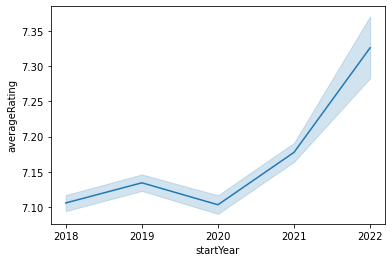

In [16]:
# An overview of the rating of films over time
sns.lineplot(data = all_data, x = 'startYear', y = 'averageRating')

From the lineplot, we see a increase in rating during the pre-COVID period, from 2018 to 2019. Then there is a sudden drop from 2019 to 2020, when COVID first occured. From 2020 to 2022, it shows an increase in the rating.



## 2018 Title Data

In [17]:
#take a look at the data of movies and TV shows released in 2018
data_2018 = data_new[data_new['startYear'] == '2018'].reset_index()
data_2018

,index,tconst,startYear,genres,averageRating
0,1169512,tt8488114,2018,"Action,Adventure,Animation",5.1
1,1181994,tt8846310,2018,Short,7.5
2,1216782,tt9865134,2018,"Comedy,Short",9.2
3,1181992,tt8846198,2018,Drama,6.1
4,1181981,tt8845840,2018,Drama,6.2
...,...,...,...,...,...
55196,1153200,tt8066650,2018,"Animation,Documentary,Short",6.7
55197,1156714,tt8159034,2018,Reality-TV,5.0
55198,1156713,tt8159030,2018,Reality-TV,5.4
55199,1153206,tt8066818,2018,"Action,Comedy",5.7


In [18]:
data_2018.shape

(55201, 5)

In [19]:
data_2018['averageRating'].describe()

count    55201.000000
mean         7.106009
std          1.395474
min          1.000000
25%          6.400000
50%          7.300000
75%          8.100000
max         10.000000
Name: averageRating, dtype: float64

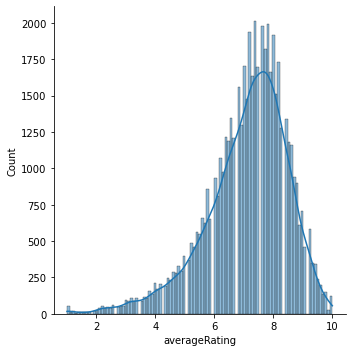

In [20]:
#take a look at the distribution of ratings
sns.displot(data_2018['averageRating'], kde = True)

In [21]:
data_2018['genres'].value_counts()

Comedy                        4291
Documentary                   4123
Drama                         3649
Reality-TV                    2179
Action,Adventure,Animation    1636
                              ... 
Fantasy,Music,Musical            1
News,Sci-Fi,Short                1
Adventure,Animation,Sport        1
Adventure,Western                1
Action,Romance,War               1
Name: genres, Length: 889, dtype: int64

From the visualization we generated, the average ratings of titles released in 2018 is normally distributed, with a little skewed to the left.
From the visualization we generated, the average ratings of titles released in 2018 is normally distributed, with a little skewed to the left.

## 2019 Title Data

In [22]:
#take a look at the data of movies and TV shows released in 2019
data_2019 = data_new[data_new['startYear'] == '2019'].reset_index()
data_2019

,index,tconst,startYear,genres,averageRating
0,1211672,tt9685290,2019,Drama,7.2
1,1208537,tt9584972,2019,Drama,5.5
2,1105931,tt6985248,2019,"Crime,Drama,Short",8.6
3,1209599,tt9619196,2019,Documentary,7.7
4,1153424,tt8072130,2019,"Action,Adventure,Mystery",8.0
...,...,...,...,...,...
55420,473045,tt10493038,2019,"Animation,Short",7.5
55421,469565,tt10433052,2019,"Animation,Drama,Mystery",8.8
55422,469475,tt10431442,2019,"Drama,Fantasy,History",7.7
55423,943808,tt4126476,2019,"Drama,Romance",5.3


In [23]:
data_2019.shape

(55425, 5)

In [24]:
data_2019['averageRating'].describe()

count    55425.000000
mean         7.134549
std          1.391018
min          1.000000
25%          6.400000
50%          7.300000
75%          8.100000
max         10.000000
Name: averageRating, dtype: float64

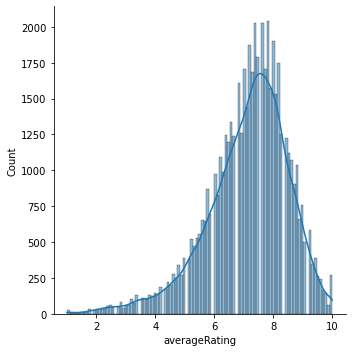

In [25]:
#take a look at the distribution of ratings
sns.displot(data_2019['averageRating'], kde = True)

From the visualization we generated, the average ratings of titles released in 2019 is normally distributed, with a little skewed to the left.

## 2020 Title Data

In [26]:
#take a look at the data of movies and TV shows released in 2019
data_2020 = data_new[data_new['startYear'] == '2020'].reset_index()
data_2020

,index,tconst,startYear,genres,averageRating
0,542597,tt11873126,2020,Drama,7.6
1,547877,tt11986728,2020,"Action,Crime,Drama",8.1
2,553174,tt12100064,2020,"Comedy,Reality-TV",7.3
3,553172,tt12100048,2020,"Comedy,Drama,Romance",3.5
4,553173,tt12100062,2020,"Adventure,Family,Reality-TV",7.5
...,...,...,...,...,...
48035,592597,tt13027374,2020,"Drama,Romance,Short",6.8
48036,593206,tt13039130,2020,Drama,5.6
48037,592677,tt13028860,2020,"Comedy,Game-Show",6.9
48038,592598,tt13027408,2020,"Documentary,Short",6.8


In [27]:
data_2020.shape

(48040, 5)

In [28]:
data_2020['averageRating'].describe()

count    48040.000000
mean         7.103447
std          1.437139
min          1.000000
25%          6.300000
50%          7.300000
75%          8.100000
max         10.000000
Name: averageRating, dtype: float64

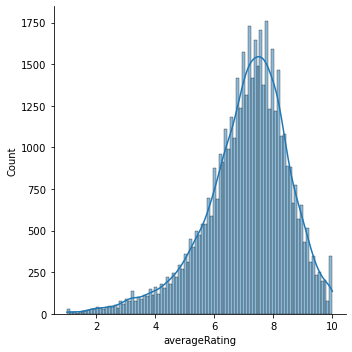

In [29]:
#take a look at the distribution of ratings
sns.displot(data_2020['averageRating'], kde = True)

From the visualization we generated, the average ratings of titles released in 2020 is normally distributed, with a little skewed to the left.



## 2021 Title Data

In [30]:
#take a look at the data of movies and TV shows released in 2019
data_2021 = data_new[data_new['startYear'] == '2021'].reset_index()
data_2021

,index,tconst,startYear,genres,averageRating
0,673755,tt15033630,2021,"Drama,Romance",8.2
1,678968,tt15173012,2021,"Drama,Romance",8.0
2,680018,tt15202426,2021,Reality-TV,8.5
3,678824,tt15170082,2021,Documentary,7.5
4,680019,tt15202578,2021,"Comedy,Talk-Show",9.1
...,...,...,...,...,...
43905,642512,tt14176872,2021,Drama,8.3
43906,645658,tt14257574,2021,"Action,Adventure,Animation",8.0
43907,642719,tt14182122,2021,Game-Show,7.4
43908,645661,tt14257596,2021,"News,Short",8.5


In [31]:
data_2021.shape

(43910, 5)

In [32]:
data_2021['averageRating'].describe()

count    43910.000000
mean         7.177764
std          1.480286
min          1.000000
25%          6.400000
50%          7.300000
75%          8.200000
max         10.000000
Name: averageRating, dtype: float64

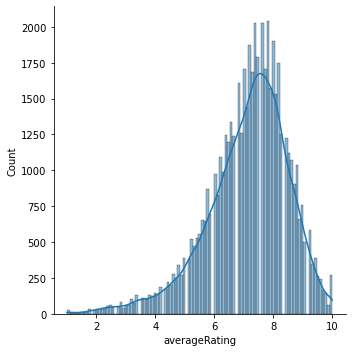

In [33]:
#take a look at the distribution of ratings
sns.displot(data_2019['averageRating'], kde = True)

From the visualization we generated, the average ratings of titles released in 2021 is normally distributed, with a little skewed to the left.

## 2022 Title Data

In [34]:
#take a look at the data of movies and TV shows released in 2019
data_2022 = data_new[data_new['startYear'] == '2022'].reset_index()
data_2022

,index,tconst,startYear,genres,averageRating
0,737137,tt17494144,2022,"Action,Sport",6.5
1,737136,tt17494134,2022,"Action,Sport",7.4
2,737816,tt17519556,2022,"Biography,Documentary",6.8
3,737903,tt17524826,2022,"Action,Adventure,Crime",7.6
4,737066,tt17490474,2022,"Adventure,Animation,Fantasy",7.7
...,...,...,...,...,...
4348,722109,tt16761514,2022,"Comedy,Romance",5.9
4349,721828,tt16751250,2022,"Action,Sport",6.8
4350,721817,tt16750580,2022,Reality-TV,6.0
4351,700408,tt15830222,2022,"Adventure,Comedy,Reality-TV",7.9


In [35]:
data_2022.shape

(4353, 5)

In [36]:
data_2022['averageRating'].describe()

count    4353.000000
mean        7.325936
std         1.487477
min         1.000000
25%         6.500000
50%         7.500000
75%         8.300000
max        10.000000
Name: averageRating, dtype: float64

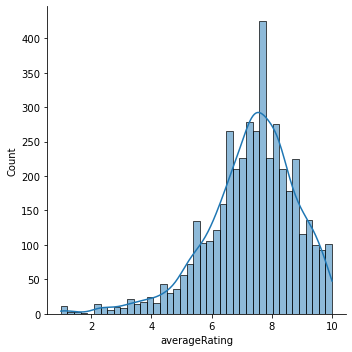

In [37]:
#take a look at the distribution of ratings
sns.displot(data_2022['averageRating'], kde = True)

From the visualization we generated, the average ratings of titles released in 2018 is normally distributed, with a little skewed to the left.

## Rating before and after pandemic

After looking at data of each year, we divide the data into rating before and after the pandemic. We extract the rating data before pandemic, and store it in `movie_before_pandemic_rating`.Then we extract the rating data after pandemic, and store it in `movie_after_pandemic_rating`.

In [38]:
movie_before_pandemic_rating = data_before_pandemic['averageRating']
movie_after_pandemic_rating = data_after_pandemic['averageRating']

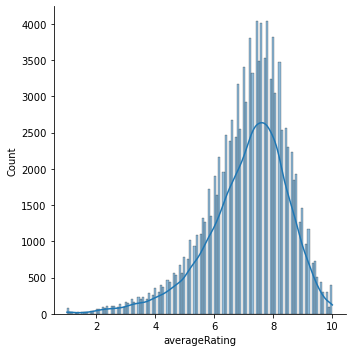

In [39]:
#take a look at the distribution of ratings before pandemic
sns.displot(movie_before_pandemic_rating, kde = True)

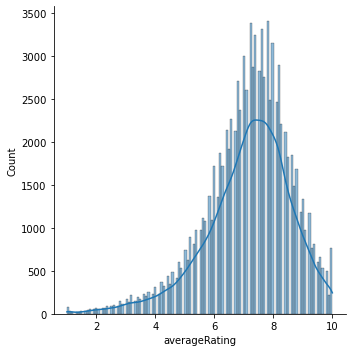

In [40]:
#take a look at the distribution of ratings after pandemic
sns.displot(movie_after_pandemic_rating, kde = True)

Carry out a t-test (using the `ttest_ind()` function) to compare the two distributions. Store the test statstic in the variable `t_val` and the p-value in the variable `p_val`.

In [41]:
t_val, p_val = ttest_ind(a = movie_after_pandemic_rating, b = movie_before_pandemic_rating)

In [42]:
t_val, p_val

(4.312579852096631, 1.6143513686951104e-05)

In [43]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


Through the t-test, we notice that there is a significant distribution difference between movie rating before and after the pandemic.

## Linear Regression

### Why Linear Regression?

We use linear regresssion for our analysis as we want to determine if there is a statistically significant linear relationship between the independent variable (year before and after pandemic) and the dependent variable (movie rating).

##### Hypothesis Testing

$H_o$: There is no relationship between year and movie rating ($\beta = 0$)

$H_a$: There is a relationship between year and movie rating ($\beta \ne 0$)

### Create a linear model to predict rating from years

### (1) Predict the rating using linear model

In [44]:
## we are going to use all data here
all_data

,tconst,startYear,genres,averageRating
1169512,tt8488114,2018,"Action,Adventure,Animation",5.1
1181994,tt8846310,2018,Short,7.5
1216782,tt9865134,2018,"Comedy,Short",9.2
1181992,tt8846198,2018,Drama,6.1
1181981,tt8845840,2018,Drama,6.2
...,...,...,...,...
722109,tt16761514,2022,"Comedy,Romance",5.9
721828,tt16751250,2022,"Action,Sport",6.8
721817,tt16750580,2022,Reality-TV,6.0
700408,tt15830222,2022,"Adventure,Comedy,Reality-TV",7.9


In [45]:
dependent, predictors = patsy.dmatrices('averageRating ~ startYear', all_data )
model = sm.OLS(dependent, predictors)
res_1 = model.fit()

In [46]:
# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     40.95
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.30e-34
Time:                        21:27:23   Log-Likelihood:            -3.6681e+05
No. Observations:              206929   AIC:                         7.336e+05
Df Residuals:                  206924   BIC:                         7.337e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.1060      0.00

Assuming we use 0.01 as the alpha value,
we are able to see that the p value in startYear == 2020 is 0.773, which is significantly larger than 0.01. Therefore we fail to reject our null hypothesis. The relationship may be happen due to chance alone. Then, We'd have to do a lot more digging/analysis before determining that conclusively!

## Genre Data

Here we want to find is there any other factor affecting the rating before and after the pandemic. We think genre of the movie would be one possible factor. So, we are trying to find out the top 10 most popular genres of the movie before and after covid.

In [47]:
#take a look at the number of genres in our data
all_data['genres'].value_counts()

Comedy                        15207
Drama                         14886
Documentary                   14871
Reality-TV                     8741
Action,Adventure,Animation     6478
                              ...  
Action,Adventure,Musical          1
Musical,Mystery,Short             1
Music,Sci-Fi,Thriller             1
Biography,History,Musical         1
Adventure,Short,War               1
Name: genres, Length: 1231, dtype: int64

In [48]:
np.sum(all_data['genres'].value_counts() > 1000)

38

In [49]:
#find the most common 10 genres of the data
top_10 = all_data['genres'].value_counts()[:10].index.tolist()


In [50]:
top_10

['Comedy',
 'Drama',
 'Documentary',
 'Reality-TV',
 'Action,Adventure,Animation',
 'Comedy,Drama',
 'Comedy,Talk-Show',
 'Drama,Short',
 'Drama,Romance',
 'Crime,Drama,Mystery']

As there are too many different genres, we decide to limit our analysis to the top 10 common genres of out dataset.

### (1) Genre changes before pandemic vs. after pandemic

Here we are going to find if there is any changes in the most popular genres before and after pandemic.

In [51]:
# all data after pandemic happen(year2018-2019)
data_before_pandemic

,tconst,startYear,genres,averageRating
1169512,tt8488114,2018,"Action,Adventure,Animation",5.1
1181994,tt8846310,2018,Short,7.5
1216782,tt9865134,2018,"Comedy,Short",9.2
1181992,tt8846198,2018,Drama,6.1
1181981,tt8845840,2018,Drama,6.2
...,...,...,...,...
473045,tt10493038,2019,"Animation,Short",7.5
469565,tt10433052,2019,"Animation,Drama,Mystery",8.8
469475,tt10431442,2019,"Drama,Fantasy,History",7.7
943808,tt4126476,2019,"Drama,Romance",5.3


In [52]:
# Determining top 10 genres before COVID
Pre_r = data_before_pandemic['genres'].value_counts(normalize = True).rename('proportion').reset_index()
Pre_top10 = Pre_r.iloc[0:10]

In [53]:
# Take a look at the top 10 genres 
Pre_top10

,index,proportion
0,Documentary,0.074603
1,Comedy,0.074377
2,Drama,0.069233
3,Reality-TV,0.041066
4,"Action,Adventure,Animation",0.032009
5,"Drama,Short",0.023494
6,"Comedy,Drama",0.021857
7,"Comedy,Talk-Show",0.021803
8,"Drama,Romance",0.019308
9,"Crime,Drama,Mystery",0.017573


Here we plot and see the top 10 genres before COVID happened.

<AxesSubplot:xlabel='proportion', ylabel='index'>

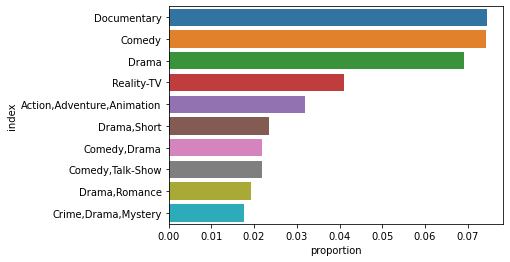

In [54]:
sns.barplot(x = 'proportion', y = 'index', data = Pre_top10)

In [55]:
# all data after pandemic happen(year2020-2022)
data_after_pandemic

,tconst,startYear,genres,averageRating
542597,tt11873126,2020,Drama,7.6
547877,tt11986728,2020,"Action,Crime,Drama",8.1
553174,tt12100064,2020,"Comedy,Reality-TV",7.3
553172,tt12100048,2020,"Comedy,Drama,Romance",3.5
553173,tt12100062,2020,"Adventure,Family,Reality-TV",7.5
...,...,...,...,...
722109,tt16761514,2022,"Comedy,Romance",5.9
721828,tt16751250,2022,"Action,Sport",6.8
721817,tt16750580,2022,Reality-TV,6.0
700408,tt15830222,2022,"Adventure,Comedy,Reality-TV",7.9


In [56]:
# Determining top10 genres after COVID
Covid_r = data_after_pandemic['genres'].value_counts(normalize = True).rename('proportion').reset_index()
Covid_top10 = Covid_r.iloc[0:10]

In [57]:
# Take a look at the top 10 genres 
Covid_top10

,index,proportion
0,Drama,0.075044
1,Comedy,0.072469
2,Documentary,0.068721
3,Reality-TV,0.043592
4,"Action,Adventure,Animation",0.030497
5,"Comedy,Drama",0.025492
6,"Crime,Drama,Mystery",0.019916
7,"Comedy,Talk-Show",0.018753
8,"Drama,Romance",0.018639
9,"Drama,Short",0.015981


Here we plot and see the top 10 genres after COVID happened.

<AxesSubplot:xlabel='proportion', ylabel='index'>

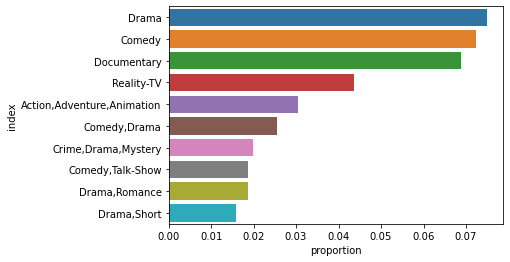

In [58]:
sns.barplot(x = 'proportion', y = 'index', data = Covid_top10)

The bar chart is very good at visualizing dsitributions of different categories. Comparing the pre-COVID and post-COVID data, we find that there is some change in the most popular genres. In the pre-COVID period, Documentary is the most popular genre, with a huge proportion of 0.074. In contrast, in the post-COVID period, Documentary drops to the third popular categories, with a proportion of only 0.068. Drama becomes the most popular genre in the post-COVID period, with its proportion changing from 0.069 to 0.075. While Reality-TV, Action&Adventure&Animation, Comedy Talks-how, and Drama&Romance maintain a relatively constant popularity, we notice the the rise of Crime&Drama&Mystery from the 10th to the 7th place, and the drop of Drama Short from the 6th to the 10th place.

### (2) Rating changes from 2018-2022

After exploring the proportion change of genres, we want to take a look at whether the average ratings of the common genres changed during Covid.

In [59]:
# Determining top 10 genres of all data (2018 - 2022)
All_r = all_data['genres'].value_counts(normalize = True).rename('proportion').reset_index()
All_top10 = All_r.iloc[0:10]


In [60]:
All_top10

,index,proportion
0,Comedy,0.073489
1,Drama,0.071938
2,Documentary,0.071865
3,Reality-TV,0.042242
4,"Action,Adventure,Animation",0.031305
5,"Comedy,Drama",0.023549
6,"Comedy,Talk-Show",0.020384
7,"Drama,Short",0.019997
8,"Drama,Romance",0.018997
9,"Crime,Drama,Mystery",0.018663


In [61]:
# Group films by the only the top ten genres
data_trend = all_data[(all_data['genres'] == 'Comedy') | (all_data['genres'] == 'Drama')
                      | (all_data['genres'] == 'Documentary') | (all_data['genres'] == 'Reality-TV')
                      | (all_data['genres'] == 'Action,Adventure,Animation') | (all_data['genres'] == 'Comedy,Drama')
                      | (all_data['genres'] == 'Comedy,Talk-Show') | (all_data['genres'] == 'Drama,Short')
                      | (all_data['genres'] == 'Drama,Romance') | (all_data['genres'] == 'Crime,Drama,Mystery') ]


In [62]:
data_trend

,tconst,startYear,genres,averageRating
1169512,tt8488114,2018,"Action,Adventure,Animation",5.1
1181992,tt8846198,2018,Drama,6.1
1181981,tt8845840,2018,Drama,6.2
516662,tt11328646,2018,Documentary,7.0
1181872,tt8841610,2018,"Drama,Short",8.5
...,...,...,...,...
722090,tt16760488,2022,Reality-TV,7.3
722091,tt16760592,2022,Comedy,2.9
721869,tt16751740,2022,Comedy,8.6
721817,tt16750580,2022,Reality-TV,6.0


First, we take a look at the average rating distribution of each one of the top 10 genres.

<AxesSubplot:xlabel='genres', ylabel='averageRating'>

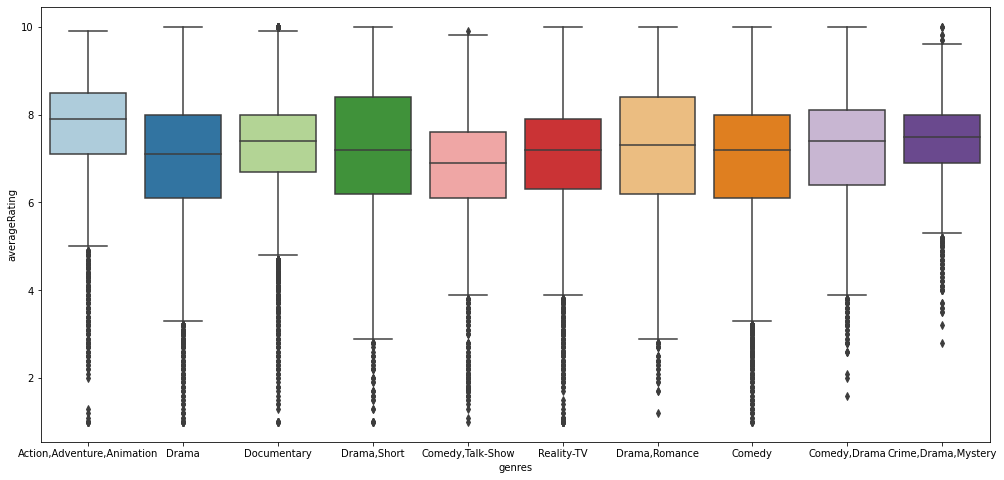

In [63]:
#take a look at the average ratings of the top 10 genres
plt.figure(figsize=(17,8))
sns.boxplot(x = 'genres', y = 'averageRating', data = data_trend, palette = 'Paired')

From the boxplot, we see that there is not sharp difference between median ratings among the genres we selected. Action Adventure Animation has the highest median ratings and Comedy Talk-Show has the lowest median ratings. Dramashort ratings shows the greatest range while Crime Drama Mystery shows a smallest range.

We use both a line plot and a grouped barplot to visualize the change of each genre.

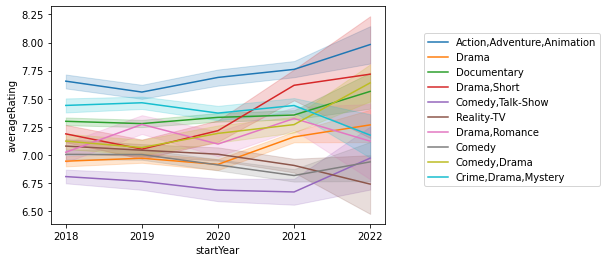

In [64]:
# Draw a lineplot to look at rating from 2018-2022
fig_t = sns.lineplot(data = data_trend, x = 'startYear', y = 'averageRating', hue = 'genres')
fig_t.legend(bbox_to_anchor=(1.1, 0.9))

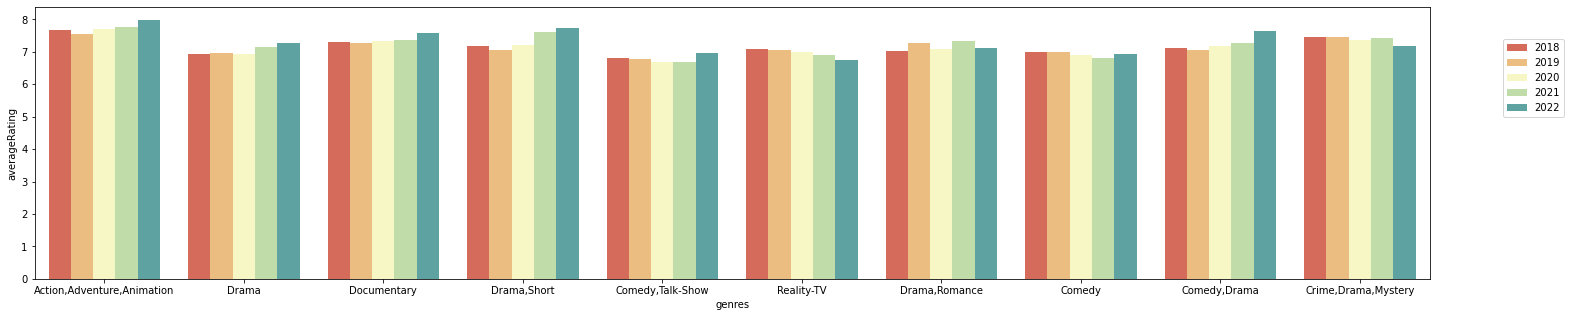

In [65]:
# Draw a grouped barchart to look at rating from 2018-2022
plt.figure(figsize=(25,5))
g = sns.barplot(data = data_trend, x = 'genres', y = 'averageRating', hue = 'startYear',ci = None, palette = 'Spectral')
g.legend(bbox_to_anchor=(1.1, 0.9))

From the plots we generated, we find that there is a slight increase in the ratings of Action&Adventure&Animation, Drama, Drama&Short, and Comedy&Drama. There is a slight decrease in the ratings of Reality-TV and Crime&Drama&Mystery.

### (3) Rating changes in different genres 

Here, we are going to compare the rating changes in the top 10 generes before and after pandemic. Then we are going to perform a t-test on the rating on each genere before and after pandemic to see if there is a significant difference in rating before and after pandemic.

#### 1. Documentary

In [66]:
# Deriving Pre-Covid Documentary Rating data  
Documentary_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Documentary']
Documentary_before_pandemic_rating = Documentary_before_pandemic['averageRating']

In [67]:
# Take a look at Pre-Covid Documentary Rating data  
Documentary_before_pandemic_rating

516662     7.0
516664     6.2
449924     6.7
1180233    6.2
1180441    5.0
          ... 
473033     6.2
943944     7.0
469412     6.6
473345     8.5
473821     6.3
Name: averageRating, Length: 8253, dtype: float64

In [68]:
# Deriving Post-Covid Documentary Rating data  
Documentary_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Documentary']
Documentary_after_pandemic_rating = Documentary_after_pandemic['averageRating']

In [69]:
# Take a look at Post-Covid Documentary Rating data  
Documentary_after_pandemic_rating

542588    7.2
553198    7.0
541344    8.0
553176    7.1
541345    7.1
         ... 
721969    7.0
721970    7.2
716731    7.3
716622    4.8
716904    6.6
Name: averageRating, Length: 6618, dtype: float64

In [70]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val1 = ttest_ind(a = Documentary_before_pandemic_rating, b = Documentary_after_pandemic_rating)
t_val, p_val1

(-3.396351425822577, 0.0006846937388764388)

In [71]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val1 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 2. Comedy	

In [72]:
# Deriving Pre-Covid Comedy Rating data  
Comedy_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Comedy']
Comedy_before_pandemic_rating = Comedy_before_pandemic['averageRating']

In [73]:
# Take a look at Pre-Covid Comedy Rating data  
Comedy_before_pandemic_rating

1181866    7.6
1180440    8.8
1181996    5.8
450434     7.6
1181999    6.4
          ... 
469897     8.3
447608     6.5
1071228    5.2
473828     8.1
1071146    7.2
Name: averageRating, Length: 8228, dtype: float64

In [74]:
# Deriving Post-Covid Comedy Rating data  
Comedy_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Comedy']
Comedy_after_pandemic_rating = Comedy_after_pandemic['averageRating']

In [75]:
# Take a look at Post-Covid Comedy Rating data  
Comedy_after_pandemic_rating

541339    8.3
541343    6.7
553417    7.4
553415    7.4
553414    7.7
         ... 
722118    5.2
669083    6.4
722091    2.9
721869    8.6
721819    3.4
Name: averageRating, Length: 6979, dtype: float64

In [76]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val2 = ttest_ind(a = Comedy_before_pandemic_rating, b = Comedy_after_pandemic_rating)
t_val, p_val2

(5.516124098720345, 3.522136477985945e-08)

In [77]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val2 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 3. Drama

In [78]:
# Deriving Pre-Covid Drama Rating data  
Drama_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Drama']
Drama_before_pandemic_rating = Drama_before_pandemic['averageRating']

In [79]:
# Take a look at Pre-Covid Drama Rating data  
Drama_before_pandemic_rating

1181992    6.1
1181981    6.2
1180228    6.6
1170001    6.3
1051202    6.5
          ... 
469478     8.2
1064148    5.9
469800     6.7
1070603    6.8
449796     5.1
Name: averageRating, Length: 7659, dtype: float64

In [80]:
# Deriving Post-Covid Drama Rating data  
Drama_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Drama']
Drama_after_pandemic_rating = Drama_after_pandemic['averageRating']

In [81]:
# Take a look at Post-Covid Drama Rating data  
Drama_after_pandemic_rating

542597    7.6
546505    8.0
546506    8.2
546509    8.2
546508    8.2
         ... 
510455    7.6
510454    7.6
510453    7.3
510452    7.2
510451    6.9
Name: averageRating, Length: 7227, dtype: float64

In [82]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val3 = ttest_ind(a = Drama_before_pandemic_rating, b = Drama_after_pandemic_rating)
t_val, p_val3

(-4.321633595565213, 1.5588343142094394e-05)

In [83]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val3 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 4. Reality-TV

In [84]:
# Deriving Pre-Covid Reality-TV Rating data  
RealityTV_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Reality-TV']
RealityTV_before_pandemic_rating = RealityTV_before_pandemic['averageRating']

In [85]:
# Take a look at Pre-Covid RealityTV Rating data  
RealityTV_before_pandemic_rating

1180323    7.0
1180322    7.4
1181971    7.1
1181975    8.2
1180401    7.1
          ... 
473319     9.4
473059     6.8
473062     7.2
473064     7.2
469765     6.0
Name: averageRating, Length: 4543, dtype: float64

In [86]:
# Deriving Post-Covid Reality-TV Rating data  
RealityTV_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Reality-TV']
RealityTV_after_pandemic_rating = RealityTV_after_pandemic['averageRating']

In [87]:
# Take a look at Post-Covid RealityTV Rating data  
RealityTV_after_pandemic_rating

542547     5.2
542541     3.4
553447     6.3
553446     5.4
553429     5.1
          ... 
721982    10.0
721981     7.6
661686     4.7
722090     7.3
721817     6.0
Name: averageRating, Length: 4198, dtype: float64

In [88]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val4 = ttest_ind(a = RealityTV_before_pandemic_rating, b = RealityTV_after_pandemic_rating)
t_val, p_val4

(3.8249795807936775, 0.0001316930256649457)

In [89]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val4 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 5. Action,Adventure,Animation	

In [90]:
# Deriving Pre-Covid Drama Rating data  
ActionAdventureAnimation_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Action,Adventure,Animation']
ActionAdventureAnimation_before_pandemic_rating = ActionAdventureAnimation_before_pandemic['averageRating']

In [91]:
# Take a look at Pre-Covid ActionAdventureAnimation Rating data  
ActionAdventureAnimation_before_pandemic_rating

1169512    5.1
1181988    6.7
1181989    7.4
1216752    6.5
1216770    8.6
          ... 
473589     9.0
473587     9.2
473586     8.4
473830     9.6
473588     9.0
Name: averageRating, Length: 3541, dtype: float64

In [92]:
# Deriving Post-Covid Action,Adventure,Animation Rating data  
ActionAdventureAnimation_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Action,Adventure,Animation']
ActionAdventureAnimation_after_pandemic_rating = ActionAdventureAnimation_after_pandemic['averageRating']

In [93]:
# Take a look at Post-Covid ActionAdventureAnimation Rating data  
ActionAdventureAnimation_after_pandemic_rating

553190    8.3
553187    8.5
542543    9.3
554836    8.2
554837    8.0
         ... 
648777    9.1
719104    6.3
717472    7.8
722280    9.0
724446    5.2
Name: averageRating, Length: 2937, dtype: float64

In [94]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val5 = ttest_ind(a = ActionAdventureAnimation_before_pandemic_rating, b = ActionAdventureAnimation_after_pandemic_rating)
t_val, p_val5

(-4.173669770775037, 3.0365710257479148e-05)

In [95]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val5 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 6. Comedy, Drama

In [96]:
# Deriving Pre-Covid ComedyDrama Rating data  
ComedyDrama_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Comedy,Drama']
ComedyDrama_before_pandemic_rating = ComedyDrama_before_pandemic['averageRating']

In [97]:
# Take a look at Pre-Covid ComedyDrama Rating data  
ComedyDrama_before_pandemic_rating

1180231    8.1
1181987    6.1
1181904    7.5
1051242    7.6
1050622    7.8
          ... 
473555     8.3
473094     7.3
473556     8.3
1063937    8.1
447544     7.5
Name: averageRating, Length: 2418, dtype: float64

In [98]:
# Deriving Post-Covid ComedyDrama Rating data  
ComedyDrama_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Comedy,Drama']
ComedyDrama_after_pandemic_rating = ComedyDrama_after_pandemic['averageRating']

In [99]:
# Take a look at Post-Covid ComedyDrama Rating data 
ComedyDrama_after_pandemic_rating

547883    6.6
547884    6.3
541329    8.1
546914    6.5
546912    2.8
         ... 
561313    8.0
561311    7.6
561314    8.2
561315    9.3
561310    7.5
Name: averageRating, Length: 2455, dtype: float64

In [100]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val6 = ttest_ind(a = ComedyDrama_before_pandemic_rating, b = ComedyDrama_after_pandemic_rating)
t_val, p_val6

(-4.821528764215727, 1.4679958209925507e-06)

In [101]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val6 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 7. Comedy,Talk-Show

In [102]:
# Deriving Pre-Covid ComedyTalk-Show Rating data  
ComedyTalkShow_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Comedy,Talk-Show']
ComedyTalkShow_before_pandemic_rating = ComedyTalkShow_before_pandemic['averageRating']

In [103]:
# Take a look at Pre-Covid ComedyTalk-Show Rating data
ComedyTalkShow_before_pandemic_rating

1169587    6.4
1180410    7.3
1180411    5.7
1180409    7.0
1180412    6.8
          ... 
472976     6.5
472972     6.4
473509     8.0
473813     7.4
473812     7.5
Name: averageRating, Length: 2412, dtype: float64

In [104]:
# Deriving Post-Covid ComedyTalk-Show Rating data  
ComedyTalkShow_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Comedy,Talk-Show']
ComedyTalkShow_after_pandemic_rating = ComedyTalkShow_after_pandemic['averageRating']

In [105]:
# Take a look at Post-Covid ComedyTalk-Show Rating data
ComedyTalkShow_after_pandemic_rating

553435    6.8
542540    6.8
547858    7.0
553349    7.3
553347    8.1
         ... 
727925    6.4
727924    6.7
721338    7.6
724465    8.9
724464    7.8
Name: averageRating, Length: 1806, dtype: float64

In [106]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val7 = ttest_ind(a = ComedyTalkShow_before_pandemic_rating, b = ComedyTalkShow_after_pandemic_rating)
t_val, p_val7

(2.2009708865798427, 0.027792099831188025)

In [107]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val7 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is NOT a significant difference!


#### 8. Drama,Short

In [108]:
# Deriving Pre-Covid DramaShort Rating data  
DramaShort_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Drama,Short']
DramaShort_before_pandemic_rating = DramaShort_before_pandemic['averageRating']

In [109]:
# Take a look at Pre-Covid DramaShort Rating data
DramaShort_before_pandemic_rating

1181872    8.5
537087     4.5
1180427    7.0
1169539    7.1
1169572    8.4
          ... 
447609     8.4
449774     8.0
473833     3.0
473829     4.5
473621     7.7
Name: averageRating, Length: 2599, dtype: float64

In [110]:
# Deriving Psot-Covid DramaShort Rating data  
DramaShort_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Drama,Short']
DramaShort_after_pandemic_rating = DramaShort_after_pandemic['averageRating']

In [111]:
# Take a look at Post-Covid DramaShort Rating data
DramaShort_after_pandemic_rating

553199     7.8
553445     9.6
554821     7.8
542574     8.5
546919     5.5
          ... 
724642     7.6
727285     6.4
726852     9.8
726865     9.4
716331    10.0
Name: averageRating, Length: 1539, dtype: float64

In [112]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val8 = ttest_ind(a = DramaShort_before_pandemic_rating, b = DramaShort_after_pandemic_rating)
t_val, p_val8

(-4.770574999780551, 1.9003344684806058e-06)

In [113]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val8 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


#### 9. Drama, Romance

In [114]:
# Deriving Pre-Covid DramaRomance Rating data  
DramaRomance_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Drama,Romance']
DramaRomance_before_pandemic_rating = DramaRomance_before_pandemic['averageRating']

In [115]:
# Take a look at Pre-Covid DramaRomance Rating data
DramaRomance_before_pandemic_rating

1181865    8.5
1181864    8.7
1049782    6.9
1180250    7.5
449907     3.0
          ... 
469261     8.9
469260     8.5
469263     8.3
469262     8.7
943808     5.3
Name: averageRating, Length: 2136, dtype: float64

In [116]:
# Deriving Post-Covid Drama,Romance Rating data  
DramaRomance_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Drama,Romance']
DramaRomance_after_pandemic_rating = DramaRomance_after_pandemic['averageRating']


In [117]:
# Take a look at Post-Covid DramaRomance Rating data
DramaRomance_after_pandemic_rating

541447    8.0
541446    7.4
542576    6.4
542564    6.1
548060    6.3
         ... 
718936    5.2
718802    6.1
686501    4.6
722743    6.3
722181    4.5
Name: averageRating, Length: 1795, dtype: float64

In [118]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val9 = ttest_ind(a = DramaRomance_before_pandemic_rating, b = DramaRomance_after_pandemic_rating)
t_val, p_val9

(-1.3469683502886087, 0.17806810921740862)

In [119]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val9 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is NOT a significant difference!


#### 10. Crime,Drama,Mystery

In [120]:
# Deriving Pre-Covid CrimeDramaMystery Rating data  
CrimeDramaMystery_before_pandemic = data_before_pandemic[data_before_pandemic['genres'] == 'Crime,Drama,Mystery']
CrimeDramaMystery_before_pandemic_rating = CrimeDramaMystery_before_pandemic['averageRating']

In [121]:
# Take a look at Pre-Covid CrimeDramaMystery Rating data
CrimeDramaMystery_before_pandemic_rating

1182042    8.5
1182043    8.2
1182041    8.6
1182044    8.2
1182046    8.2
          ... 
473921     7.8
447546     8.5
447547     7.8
447549     8.8
469813     5.4
Name: averageRating, Length: 1944, dtype: float64

In [122]:
# Deriving Post-Covid Crime,Drama,Mystery Rating data  
CrimeDramaMystery_after_pandemic = data_after_pandemic[data_after_pandemic['genres'] == 'Crime,Drama,Mystery']
CrimeDramaMystery_after_pandemic_rating = CrimeDramaMystery_after_pandemic['averageRating']

In [123]:
# Take a look at Post-Covid CrimeDramaMystery Rating data
CrimeDramaMystery_after_pandemic_rating

1167357    7.7
1167358    7.4
1167359    7.8
542532     7.6
1167350    7.9
          ... 
722178     8.0
722337     6.3
724018     8.3
723625     7.0
721964     6.2
Name: averageRating, Length: 1918, dtype: float64

In [124]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val10 = ttest_ind(a = DramaRomance_before_pandemic_rating, b = DramaRomance_after_pandemic_rating)
t_val, p_val10

(-1.3469683502886087, 0.17806810921740862)

In [125]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val10 < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is NOT a significant difference!


Suprisingly, after we conducted t-test on the top 10 genres, we find that all genres except `Comedy,Talk-Show`, `Drama,Romance`, and `Crime,Drama,Mystery`show a significant difference in ratings before and after COVID.

### FDR correction

As we are doing multiple comparisons, we then use FDR correction to control the number of potential false-positive.

In [126]:
#put all of the 10 p-values above into a list
p_val_list = [p_val1,p_val2,p_val3,p_val4,p_val5,p_val6,p_val7,p_val8,p_val9,p_val10]
p_val_list

[0.0006846937388764388,
 3.522136477985945e-08,
 1.5588343142094394e-05,
 0.0001316930256649457,
 3.0365710257479148e-05,
 1.4679958209925507e-06,
 0.027792099831188025,
 1.9003344684806058e-06,
 0.17806810921740862,
 0.17806810921740862]

In [127]:
#perform the FDR adjustment
p_val_list.sort()

In [128]:
rank = 1
len_p_val_list = len(p_val_list)
p_adj_list = []
for p in p_val_list:
    fdr_adj_p_val = p*len_p_val_list/rank
    rank += 1
    p_adj_list.append(
    {'p_val': p, 
     'fdr_adj_p_val': fdr_adj_p_val})

In [129]:
p_adj_list

[{'p_val': 3.522136477985945e-08, 'fdr_adj_p_val': 3.5221364779859446e-07},
 {'p_val': 1.4679958209925507e-06, 'fdr_adj_p_val': 7.339979104962753e-06},
 {'p_val': 1.9003344684806058e-06, 'fdr_adj_p_val': 6.334448228268686e-06},
 {'p_val': 1.5588343142094394e-05, 'fdr_adj_p_val': 3.8970857855235986e-05},
 {'p_val': 3.0365710257479148e-05, 'fdr_adj_p_val': 6.0731420514958296e-05},
 {'p_val': 0.0001316930256649457, 'fdr_adj_p_val': 0.00021948837610824283},
 {'p_val': 0.0006846937388764388, 'fdr_adj_p_val': 0.0009781339126806268},
 {'p_val': 0.027792099831188025, 'fdr_adj_p_val': 0.034740124788985034},
 {'p_val': 0.17806810921740862, 'fdr_adj_p_val': 0.19785345468600957},
 {'p_val': 0.17806810921740862, 'fdr_adj_p_val': 0.17806810921740862}]

After applying the FDR correction, we find that the result remains the same. All genres except `Comedy,Talk-Show`, `Drama,Romance`, and `Crime,Drama,Mystery`show a significant difference in ratings before and after COVID.

Noitce that there are some overlapping categories in the genres set by the raw dataset. Therefore, we further examine if the ratings of those individual categories change before and after the pandemic. 

In the top 10 genres among all data (2018-2022), `Drama` appears 5 times and `Comedy` appears 5 times.We decide to focus on these two most common genres.

### 1. Drama

We are going to take a deeper look at average rating of all generes including drama before and after the pandemic

In [130]:
# Deriving Pre-Covid BigDrama Rating data  
DramaM_before_pandemic = data_before_pandemic[(data_before_pandemic['genres'] == 'Crime,Drama,Mystery') | (data_before_pandemic['genres'] == 'Drama')
                                             | (data_before_pandemic['genres'] == 'Drama,Short')  | (data_before_pandemic['genres'] == 'Comedy,Drama')
                                             | (data_after_pandemic['genres'] == 'Drama,Romance')]  
DramaM_before_pandemic_rating = DramaM_before_pandemic['averageRating']


/var/folders/vc/094wqshj2cvfjrr0qk_q87140000gn/T/ipykernel_27485/1604438831.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DramaM_before_pandemic = data_before_pandemic[(data_before_pandemic['genres'] == 'Crime,Drama,Mystery') | (data_before_pandemic['genres'] == 'Drama')


In [131]:
# Take a look at the Pre-Covid BigDrama Rating data
DramaM_before_pandemic_rating

1181992    6.1
1181981    6.2
1181872    8.5
1180228    6.6
1170001    6.3
          ... 
1070603    6.8
449796     5.1
473829     4.5
473621     7.7
447544     7.5
Name: averageRating, Length: 14620, dtype: float64

In [132]:
# Deriving Post-Covid BigDrama Rating data  
DramaM_after_pandemic = data_after_pandemic[(data_after_pandemic['genres'] == 'Crime,Drama,Mystery') | (data_after_pandemic['genres'] == 'Drama')
                                            | (data_after_pandemic['genres'] == 'Drama,Short')  | (data_after_pandemic['genres'] == 'Comedy,Drama')
                                            | (data_after_pandemic['genres'] == 'Drama,Romance') ]  
DramaM_after_pandemic_rating = DramaM_after_pandemic['averageRating']


In [133]:
# Take a look at the Post-Covid BigDrama Rating data
DramaM_after_pandemic_rating

542597     7.6
1167357    7.7
547883     6.6
547884     6.3
546505     8.0
          ... 
510455     7.6
510454     7.6
510453     7.3
510452     7.2
510451     6.9
Name: averageRating, Length: 14934, dtype: float64

We are going to plot to see the change of average rating for all generes including drama during 2018-2022

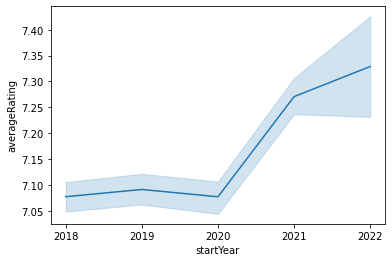

In [134]:
# Quick glimpse of rating changes of BigDrama category 
DramaM_data = all_data[(all_data['genres'] == 'Crime,Drama,Mystery') | (all_data['genres'] == 'Drama')
                       | (all_data['genres'] == 'Drama,Short')  | (all_data['genres'] == 'Comedy,Drama')
                       | (all_data['genres'] == 'Drama,Romance') ]  
fig_t = sns.lineplot(data = DramaM_data, x = 'startYear', y = 'averageRating')

From the line plot, we notice that there is a slight decrease from 2019 to 2020, following with a spike in rating from 2020 to 2021.

In [135]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val = ttest_ind(a = DramaM_before_pandemic_rating, b = DramaM_after_pandemic_rating)
t_val, p_val

(-6.819457392027846, 9.314311242521604e-12)

In [136]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


After we conducted t-test on the all generes containing drama, we find that there is a significant difference in ratings before and after COVID.

### 2. Comedy

We are going to take a deeper look at average rating of all generes including Comedy before and after the pandemic

In [137]:
# Deriving Pre-Covid BigComedy Rating data  
ComedyM_before_pandemic = data_before_pandemic[(data_before_pandemic['genres'] == 'Comedy') | (data_before_pandemic['genres'] == 'Comedy,Drama')
                                              | (data_before_pandemic['genres'] == 'Comedy,Talk-Show')]  
ComedyM_before_pandemic_rating = ComedyM_before_pandemic['averageRating']


In [138]:
# Take a look at the Pre-Covid BigComedy Rating data
ComedyM_before_pandemic_rating

1169587    6.4
1181866    7.6
1180440    8.8
1180231    8.1
1181996    5.8
          ... 
1063937    8.1
1071228    5.2
473828     8.1
447544     7.5
1071146    7.2
Name: averageRating, Length: 13058, dtype: float64

In [139]:
# Deriving Post-Covid BigComedy Rating data  
ComedyM_after_pandemic = data_after_pandemic[(data_after_pandemic['genres'] == 'Comedy') | (data_after_pandemic['genres'] == 'Comedy,Drama')
                                              | (data_after_pandemic['genres'] == 'Comedy,Talk-Show')]  
ComedyM_after_pandemic_rating = ComedyM_after_pandemic['averageRating']

In [140]:
# Take a look at the Post-Covid BigComedy Rating data
ComedyM_after_pandemic_rating

547883    6.6
547884    6.3
541339    8.3
541343    6.7
541329    8.1
         ... 
722118    5.2
669083    6.4
722091    2.9
721869    8.6
721819    3.4
Name: averageRating, Length: 11240, dtype: float64

We are going to plot to see the change of average rating for all generes including Comedy during 2018-2022

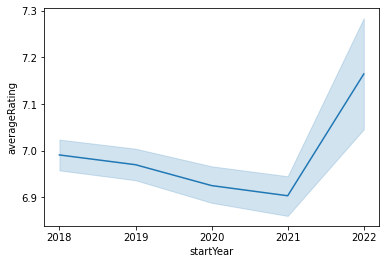

In [141]:
# Quick glimpse of rating changes of BigComedy category 
ComedyM_data = all_data[(all_data['genres'] == 'Comedy') | (all_data['genres'] == 'Comedy,Drama')
                                              | (all_data['genres'] == 'Comedy,Talk-Show')]  
fig_t = sns.lineplot(data = ComedyM_data, x = 'startYear', y = 'averageRating')

From the line plot, the average rating decreases every year from 2018 to 2021, but suddenly increases from 2021 to 2022.

In [142]:
# Determining test and p-value to identify if a significant difference exists
t_val, p_val = ttest_ind(a = ComedyM_before_pandemic_rating, b = ComedyM_after_pandemic_rating)
t_val, p_val

(2.8930079200103074, 0.0038191059406776284)

In [143]:
# Check if statistical test passes significance
# using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('There is a significant difference!')
else:
    print('There is NOT a significant difference!')

There is a significant difference!


After we conducted t-test on the all generes containing drama, we find that there is a significant difference in ratings before and after COVID.

# Ethics & Privacy

### A. Data Collection
The datasets we use come from publicly available datasets (1), and we will only use the datasets for research purposes. The IMDb datasets we use are “available for access to customers for personal and non-commercial use”. 

The IMDb dataset does not include any personally identifiable information (PII). The only subdataset that relates to users’ ratings is `Title.ratings.tsv.gz`, and it only contains: `tconst` — the alphanumeric unique identifier of the title, `averageRating` — the weighted average of all the individual user ratings, and `numVotes` — the number of votes the title has received.

We recognize the potential biases in the IMDb ratings we will use. The ratings could be potentially biased towards the western population as the majority of IMDb users are from western countries. The ratings could also be biased towards the male population as there are significantly more male users than female users (2).

We are aware of the possibility of intentionally manipulating the ratings (either improving or lowering the rating). To deal with this issue, IMDb has “several safeguards in place to automatically detect and defeat this type of ballot stuffing” and “apply several countermeasures against all attempts to skew the rating (3).”

### B. Data Storage
All of our data is electronic, and will be safely stored in our private Github repository. When all our group members leave the group, the data will be stored in the COGS108 repository, and it is the right of the instructor then to decide when to destroy the stored data.

### C. Analysis
We well-document the process of how we generate our analysis and make it reproducible by including all our codes and sources in case we discover issues in the future.

### D. Deployment
We recognize that there could be unintended consequences of our project. Our results do suggest there is a statistically significant relationship between COVID and the ratings. Movie producers can be less likely to make movies as they know the works will be negatively affected beforehand. It is also possible that producers choose to produce specific types of movies/TV shows as we do find relationship between ratings and the genres. We will consider removing our project from the internet if the situation does occur. But do keep in mind that our project has limitations because of the complex nature of COVID. Therefore, it should not act as an authoriative source to follow.

References:
- 1)https://www.imdb.com/interfaces/
- 2)https://community-imdb.sprinklr.com/conversations/imdbcom/percentage-of-registered-users-by-gender/5f4a79718815453dba7d8434
- 3)https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#

# Conclusion & Discussion

Based on our analysis, we do see a significant difference in ratings before and during the pandemic. However,differing from our initial hypothesis,the average IMDb ratings of movie and TV shows released during the COVID-19 pandemic are not generally lower than those released before the pandemic. The results have shown that the average movie ratings in 2020-2022 has increased compared to those between 2018-2019. We ran both t-tests and linear regression to assess the data. By running t-tests on average ratings before and after pandemic using datasets from IMDb, we were able to establish a statistically significant relationship between the average ratings before and during the pandemic. 

Taking the nature of COVID-19 into consideration, we assume that such significance might arise from two major reasons: 1) the quality of movie production and 2) the psychological states of the audience. Firstly, the film industry has suffered from substantial impacts such that countless production companies were forced to change schedules and shut down. The making process of movies also faced problems like the quarantine and health problems. All of these factors can damage the quality of movies produced during the pandemic. The other possible reason is the change in assessment criteria of the audience. They could be having either lower or higher standards of movies due to boredom and other negative mental states as a result of the pandemic, thus leading to the significant differences between the average ratings. We also identified genres as one of the factors affecting movie ratings and ran t-test analysis on the top 10 genres. Looking at the results, it is clear that a large number of genres, such as documentary, drama and comedy, has significant influence on the ratings. Upon analysis, we could say that genres also play an important role in assessing the relationship between movie ratings and the pandemic that is in need of further analysis. 
 
One of the biggest limitations of our study comes from the complex nature of the Covid-19 situation. Due to the unprecedented condition of the pandemic, countless factors no doubt exist in causing the significance in the relationship between movie ratings and the global pandemic. For example, the emergence of new streaming video services from companies like Disney and Netflix has encouraged numbers of at-home viewers, which has differed largely from theatrical experience. The decrease in the number of movie releases may also play a role in the audience judging the quality of movies. Moving forward, we suggest future research to focus on further analyzing the differences in the average ratings along with above factors. It would help to understand the specific influence of Covid-19 on the film industry such as what contributes to the audience’s criteria and the change in movie ratings. Future study should try to assess which specific factors, other than the quality of the film industry and the condition of the movie audience, are at play in causing and mediating the relationship, thus enabling us to untangle the complexity in the covid-19 situation. Another limitation is we only have one overall average rating for each title rather than the collection of ratings of each individual. We don’t have the specific date a rating is published, and we only have numeric ratings instead of text reviews. In the future, it would be ideal to use web scraping and text analysis tools to further analyze the rating/review of the audience. For instance, if we could access the specific date the rating is published, we would be able to explore the relationship between ratings and COVID based on the trend of average ratings in different periods and the trend of new Covid cases.  
Overall, our work shows how COVID-19 could affect people’s attitudes towards entertainment. It also promotes further inferential research in multiple fields, such as psychology, sociology, and business, to study people’s behaviors and evaluations during the pandemic.

# Team Contributions

Jiaqi Chen - Found data, wrote hypothesis and RQ, data cleaning, wrote overview and discussion&conclusion, present on EDA results
<br>
Caiyi Li - ppt, background,research question, update coding, and conclusion
<br>
Man Kui Sit - Background, Found Data, Data Cleaning, Analysis, Discussion
<br>
Yutong Chen - Background, Datasets, Data cleaning, EDA, Ethics&Privacy, Discussion, slides, present hypothesis+data
<br>
Xinyu Deng - EDA Coding and graph description, slides, present on EDA results
<br>